In [1]:
import pandas as pd

In [2]:
raw_data_dir = "/mnt/bal31/jhsu/gpufarm/LitCovid/gda_rst.tsv"

rst = pd.read_csv(raw_data_dir, sep='\t', header=0)

In [3]:
rst.head()

,pmid,geneId,diseaseId,g_name,d_name,prob_avg,prob_X
0,32659213,2244,D001778,fibrinogen,Coagulation disorder|coagulopathy,0.52569,0.64447;0.48512;0.43693;0.38273;0.40105;0.6472...
1,32659213,2244,C000657245,fibrinogen,COVID-19,0.95127,0.97348;0.94583;0.91583;0.92663;0.95234;0.9508...
2,32659213,3552,C000657245,IL-1,COVID-19,0.52286,0.57822;0.50934;0.34244;0.48419;0.44281;0.5779...
3,32659213,3558,C000657245,IL-2,COVID-19,0.52286,0.57822;0.50934;0.34244;0.48419;0.44281;0.5779...
4,32659213,3569,C000657245,IL-6,COVID-19,0.52286,0.57822;0.50934;0.34244;0.48419;0.44281;0.5779...


In [4]:
covid_rst = rst[rst.diseaseId == '']

In [4]:
all_gdp_df = rst.groupby(['diseaseId'])['d_name'].apply(lambda x: "%s" % ' | '.join(x)).reset_index()
all_gdp_df['mer_s'] = all_gdp_df['d_name'].map(lambda x: ' | '.join(list(sorted(set([i.strip() for i in x.split('|')])))))
all_gdp_df['disease_n'] = all_gdp_df['d_name'].map(lambda x: sorted(set([i.strip() for i in x.split('|')]))[0])
all_gdp_df['cnt'] = rst.groupby(['diseaseId'], as_index=False)['d_name'].size().values

In [5]:
all_gdp_df = all_gdp_df.sort_values(['cnt']).reset_index(drop=True)
all_gdp_df.tail(10).iloc[::-1]

,diseaseId,d_name,mer_s,disease_n,cnt
896,C000657245,COVID-19 | COVID-19 | COVID-19 | COVID-19 | CO...,"(coronavirus disease-2019) infection | 000,000...",(coronavirus disease-2019) infection,10362
895,D007249,inflammation | inflammation | inflammation | i...,EAT inflammation | Excess inflammation | Hyper...,EAT inflammation,785
894,D012128,acute respiratory distress syndrome|ARDS | acu...,ARDS | ARDS P | ARDS inflammation | ARDS lung ...,ARDS,730
893,D018352,coronavirus disease | MERS-CoV infection|MERS-...,CoV S infection | CoV infected | CoV infection...,CoV S infection,473
892,D011014,pneumonia|lung inflammation | pneumonia|pulmon...,ARD and pneumonia | IR-pneumonitis | Lung Pneu...,ARD and pneumonia,365
891,D009765,obesity | obesity|obese | obesity|obesities | ...,British Obesity | OB | OB and N-OB | OB than N...,British Obesity,361
890,D001102,viral skin infections|viral infection | virus ...,GI viral infections | HIV viral infection | Vi...,GI viral infections,345
889,D003643,mortality|death | mortality | death | mortalit...,CVD died | Death | Mortality | death | death o...,CVD died,262
888,D006331,cardiac injury|heart disease|cardiac damage|ca...,Cardiac Injury | Cardiac Injury Patterns | Car...,Cardiac Injury,252
887,D007239,infection|infections|infected | infection|infe...,'infection | 'infections | -infection | -infec...,'infection,245


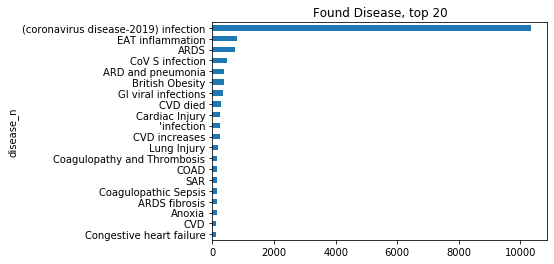

In [6]:
all_gdp_df = all_gdp_df.set_index('disease_n')
all_gdp_df.cnt[-20:].plot(kind='barh', title='Found Disease, top 20')

In [7]:
covid_rst = rst[rst.diseaseId == 'C000657245']
covid_rst = covid_rst[covid_rst.geneId != 5973]
covid_rst = covid_rst[covid_rst.geneId != 5447]
covid_rst = covid_rst[covid_rst.geneId != 57379]

,geneId,g_name,mer_s,gene_n,cnt
0,2,alpha2 -Macroglobulin|alpha2-M,alpha2 -Macroglobulin | alpha2-M,alpha2-M (2),1
1,6662,SOX9,SOX9,SOX9 (6662),1
2,6687,CMAR,CMAR,CMAR (6687),1
3,89910,Kos,Kos,Kos (89910),1
4,6692,HAI,HAI,HAI (6692),1
...,...,...,...,...,...
1226,1636,angiotensin-converting enzyme|ACE | angiotensi...,ACE | ACE)1 | ACE1 | Angiotensin (Ang)-convert...,ACE (1636),243
1227,43740568,spike | spike|S|S protein | spike | S-protein|...,"S | S Protein | S protein | S, and RNA-depende...",spike (43740568),244
1228,1401,CRP|C-reactive protein | C-reactive protein|C-...,C - reactive protein | C Reactive Protein | C ...,C-reactive protein (1401),539
1229,3569,IL-6 | IL-6 | IL-6 | IL6|IL-6 | IL-6 | Il-6 | ...,Anti-interleukin-6 | IL (interleukin)-6 | IL 6...,IL-6 (3569),867


In [27]:
all_gdp_df = covid_rst.groupby(['geneId'])['g_name'].apply(lambda x: "%s" % ' | '.join(x)).reset_index()


def get_c(lst):
    return max([(lst.count(c),c) for c in set(lst)])[1]

all_gdp_df['mer_s'] = all_gdp_df['g_name'].map(lambda x: ' | '.join(list(sorted(set([i.strip() for i in x.split('|')])))))
# all_gdp_df['gene_n'] = all_gdp_df['g_name'].map(lambda x: [i.strip() for i in x.split('|')][0])
all_gdp_df['gene_n'] = all_gdp_df['g_name'].map(lambda x: get_c([i.strip() for i in x.split('|')]))
all_gdp_df['gene_n'] = all_gdp_df.apply(lambda x: '%s (%s)' % (str(x['gene_n']), str(x['geneId'])), axis=1)

all_gdp_df['cnt'] = covid_rst.groupby(['geneId'], as_index=False)['g_name'].size().values

all_gdp_df = all_gdp_df.sort_values(['cnt']).reset_index(drop=True)

In [37]:
all_gdp_df.loc[all_gdp_df.index == 1222,'gene_n'] = 'ORF1a/b (43740578)'

In [38]:
all_gdp_df.tail(15).iloc[::-1]

,geneId,g_name,mer_s,gene_n,cnt
1230,59272,angiotensin-converting enzyme 2 | ACE2|Angiote...,2 | 2 (ACE2 | 89C8-ACE2 | ACE | ACE 2 | ACE) 2...,ACE2 (59272),2103
1229,3569,IL-6 | IL-6 | IL-6 | IL6|IL-6 | IL-6 | Il-6 | ...,Anti-interleukin-6 | IL (interleukin)-6 | IL 6...,IL-6 (3569),867
1228,1401,CRP|C-reactive protein | C-reactive protein|C-...,C - reactive protein | C Reactive Protein | C ...,C-reactive protein (1401),539
1227,43740568,spike | spike|S|S protein | spike | S-protein|...,"S | S Protein | S protein | S, and RNA-depende...",spike (43740568),244
1226,1636,angiotensin-converting enzyme|ACE | angiotensi...,ACE | ACE)1 | ACE1 | Angiotensin (Ang)-convert...,ACE (1636),243
1225,7124,TNF-alpha | tumour necrosis factor|TNF | TNF-a...,(TNF)-alpha | A | Anti-tumour necrosis factor ...,TNF-alpha (7124),241
1224,7113,TMPRSS2|Transmembrane Protease Serine 2|transm...,2 | 2 (TMPRSS2 | TMPRSS-2 | TMPRSS2 | TMPRSS2 ...,TMPRSS2 (7113),187
1223,3552,IL-1 | interleukin (IL)-1beta|IL-1beta | IL-1b...,"IL (interleukin)-1beta | IL""-1 beta | IL-1 | I...",IL-1beta (3552),183
1222,43740578,RdRp|Hel|ORF1a/b|ORF1b | ORF1ab|nsp6 | RdRp | ...,3-CL pro | 3CLpro | Hel | NSP | NSP 3 | NSP-7 ...,ORF1a/b (43740578),131
1221,2244,fibrinogen | fibrinogen | fibrinogen | fibrino...,FIB | Fg | Fibrin(Ogen) | Fibrin(ogen) | Fibri...,fibrinogen (2244),125


Text(0, 0.5, 'Gene name (Gene Id)')

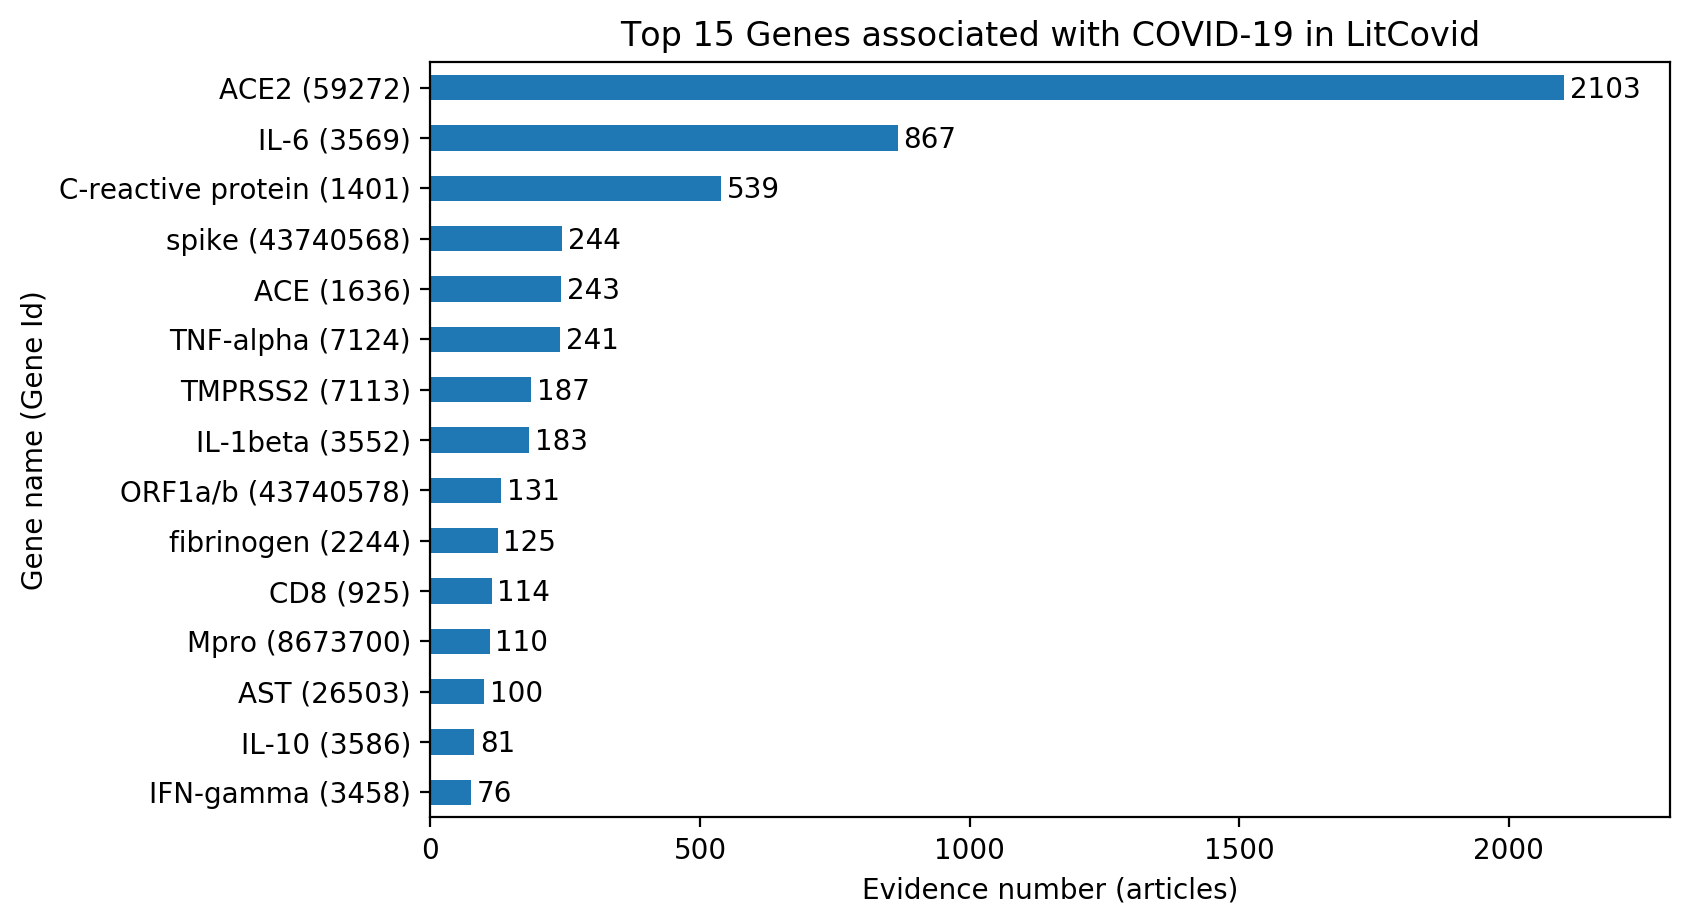

In [42]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200

_all_gdp_df = all_gdp_df.set_index('gene_n')
ax = _all_gdp_df.cnt[-15:].plot(kind='barh', title='Top 15 Genes associated with COVID-19 in LitCovid', figsize=(8,5))

ax.set_xlim(0, 2300)
for p in ax.patches:
    ax.annotate("%d" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(2, 1), textcoords='offset points')

ax.set_xlabel("Evidence number (articles)")
ax.set_ylabel("Gene name (Gene Id)")
# plt.savefig('covid_rst.png', dpi=300)

In [175]:
 rst[(rst['diseaseId'] == 'C000657245') & (rst['geneId'] == 57379)]

,pmid,geneId,diseaseId,g_name,d_name,prob_avg,prob_X
189,32583423,57379,C000657245,aid,COVID-19,0.64945,0.75184;0.63368;0.56434;0.73758;0.58133;0.8158...
411,32584166,57379,C000657245,aid,COVID-19,0.87931,0.92076;0.88441;0.82067;0.86110;0.81943;0.8931...
575,32421497,57379,C000657245,aid,COVID-19,0.46627,0.55083;0.30655;0.41810;0.39472;0.24493;0.6121...
713,32551762,57379,C000657245,Aid,COVID-19|COVID,0.66001,0.64990;0.70038;0.60399;0.75509;0.46819;0.7548...
1016,32325474,57379,C000657245,aid,COVID-19,0.66247,0.72645;0.65667;0.52740;0.71853;0.53968;0.7787...
...,...,...,...,...,...,...,...
20086,32684717,57379,C000657245,aid,COVID 19|COVID|COVID-19,0.74813,0.75231;0.85696;0.59578;0.70818;0.77032;0.6187...
20484,32499091,57379,C000657245,aid,COVID-19,0.58380,0.65388;0.54026;0.47744;0.45243;0.46642;0.6955...
20646,32915477,57379,C000657245,Aid,Novel Coronavirus Disease|COVID-19|2019 (COVID...,0.46790,0.59222;0.50925;0.44123;0.70586;0.25300;0.5233...
20770,32284619,57379,C000657245,aid,COVID-19,0.46823,0.60855;0.29017;0.44833;0.52767;0.20703;0.5617...
